### Imports

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import os
import re
from collections import Counter
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

from keras.preprocessing.text import Tokenizer
from nltk import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### data preparation

In [193]:
dir_data1 = '/content/Posts containing hate _ instagram - Sheet1.csv'
dir_data2 = '/content/Twitter_Instagram_Annotated1.csv'
dir_data3 = '/content/Twitter_data_annotated_Lamia.csv'
dir_data4 = '/content/labeled_tweet_data.csv'
dir_data5 = '/content/twitter_homophobia.csv'

In [ ]:
#Import the data 
data1 = pd.read_csv(dir_data1)
data2 = pd.read_csv(dir_data2)
data3 = pd.read_csv(dir_data3)
data4 = pd.read_csv(dir_data4)
data5 = pd.read_csv(dir_data5)

In [ ]:
data1.head(5)

In [ ]:
data1 = data1.drop(columns=['Post', 'Type'])

In [ ]:
data1.rename(columns = {'Sentence':'Text'}, inplace = True)

In [ ]:
data2.head(5)

In [ ]:
data2 = data2.drop(columns=['ID'])

In [ ]:
data3.head(5)

In [ ]:
data3 = data3.drop(columns=['id', 'created_at','user_id'])

In [ ]:
data3.rename(columns = {'text':'Text'}, inplace = True)

In [ ]:
data3.head(5)

In [ ]:
data4.head(5)

In [ ]:
data4 = data4.drop(columns=['Line', 'created_at','user_id','label','label2','to be removed'])

In [ ]:
data4.rename(columns = {'merged_labels':'Label','text':'Text'}, inplace = True)

In [ ]:
data5.head(5)

In [ ]:
data5 = data5.drop(columns=['id', 'created_at','user_id','Comments'])

In [ ]:
data5.head(5)

In [ ]:
data5.rename(columns = {'label':'Label','text':'Text'}, inplace = True)

In [ ]:
data5.head(5)

In [ ]:
data = pd.concat([data1, data2,data3,data4,data5], axis=0)

In [ ]:
data.to_csv('Annotated_data.csv', index=False)

### Data preprocessing

In [217]:
dir_data = '/content/Annotated_data.csv'
#Import the data 
data = pd.read_csv(dir_data, header= None)
n_data=open("Data.txt",'w')
dir_clas =open("Classes.txt",'w')

#### Functions for the preprocessing

In [218]:
def remove_emojis(data):
    
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons 
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"  # ✂ ➰
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

###################################################################

def remove_small_char(data):
  nltk_tokens = nltk.word_tokenize(data)

  for i in range(len(nltk_tokens)):
      if len(nltk_tokens[i]) < 3:
        nltk_tokens[i] = ""
  return " ".join(nltk_tokens)

###################################################################

def Lower_casing(data):
  data_lower = [word.lower() for word in data.split()]
  return ' '.join(data_lower)

###################################################################
def Punctuation_Removal(data):
  punc = '''+=!()-¯·[]{};:’'"\,<>./?‰@#$€¦%^&*_~«»´…ðÿž˜§ïª™'''
  for ele in data:
    if ele in punc:
      data = data.replace(ele, " ")
  return data

###################################################################


days = ['lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche']
months = ["janvier", "février", "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre"]

final_stopwords_list = set(stopwords.words('french'))

def stopwords_removal(data):
  filtered_sentence = [w for w in data.split() if not w.lower() in final_stopwords_list]
  filtered_sentence = []
  for w in data.split():
    if w not in final_stopwords_list: 
      filtered_sentence.append(w)
  return " ".join(filtered_sentence)

###################################################################
def Number_removal(data):
  return re.sub(r'\d+', '', data)


#### The global preprocessing function

In [219]:
import math
def Preprocessing(data):
  tokenizer = RegexpTokenizer(r'\w+')
  lemmatizer = WordNetLemmatizer()
  for frase in range (1,len(data)):
    data_line = data[0][frase]
    
    print(data_line)
    data_line = re.sub(r'https?:\/\/\S*', '', data_line, flags=re.MULTILINE) # remove links
    data_line = re.sub(r'#\S*', '', data_line, flags=re.MULTILINE) #remove taggs 
    data_line = re.sub(r'@\S*', '', data_line, flags=re.MULTILINE) # remove @
    data_line = remove_emojis(data_line) # remove emojis
    data_line = Lower_casing(data_line) # lower casing
    data_line = Punctuation_Removal(data_line) # remove punctuation
    data_line = Number_removal(data_line) #remove numbers
    data_line = stopwords_removal(data_line) # remove stopwords

    text_tokenized = tokenizer.tokenize(data_line)
    text_lemmatized = [lemmatizer.lemmatize(token) for token in text_tokenized]
    
    data_line = remove_small_char(data_line)
    data_line = " ".join(data_line.split()) #remove duplicated spaces


    if (data_line is not float) and (data_line.strip() != "") and (data_line is not np.nan) and (data_line !='nan'): # Check if a line is Empty
      class_line = data[1][frase]
      
      if(type(class_line)!=float and class_line not in ['Denigration','denigration','Harassment','harassment','Insult','insult','Shaming', 'shaming', 'Remove'] ):
        class_line = class_line.split(',')[0]
        if (class_line in ['Sexism ', 'Sexual Harassment','sexism', 'sexism ','sexual harassment'] ):
          class_line = 'Sexism'
        elif class_line in ['Bullying ','bullying ','bullying']:
          class_line = 'Bullying'
        #elif class_line in ['denigration']:
          #class_line = 'Denigration'
        elif class_line in ['Hate speech', 'Hate speech ','hate speech ', 'hate sppech', 'Hate_Speech','hate', 'hate speech']:
          class_line = 'Hate Speech'
        #elif class_line in['harassment']:
          #class_line = 'Harassment'
        elif class_line in ['none', 'none ', 'nonev','no']:
          class_line = 'None'
        elif class_line in ['racism', 'racism ','Racism ']:
          class_line = 'Racism'
        #elif class_line in ['insult']:
          #class_line = 'Insult''''
        elif class_line in ['homophobia']:
          class_line = 'Homophobia'
        


        n_data.write(data_line)
        n_data.write(os.linesep)
        
        dir_clas.write(class_line)
        dir_clas.write(os.linesep)
    
       
  dir_clas.close()
  n_data.close()

In [ ]:
Preprocessing(data)

### Modeling

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
import pandas as pd
import seaborn as sn
import tensorflow as tf
import tensorflow.compat.v1 as tf
from tensorflow import keras
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

In [222]:
#Data and clas import
dir_data = 'Data.txt'
dir_clas = 'Classes.txt'
data = pd.read_csv(dir_data, header=None)
clas = pd.read_csv(dir_clas, header=None)

In [223]:
data.shape, clas.shape

((13032, 1), (13032, 1))

In [224]:
#Training and test data
test_size=0.10

x_,x_test,y_,y_test = train_test_split(data, clas, test_size=test_size)
x_train,x_val,y_train,y_val = train_test_split(x_, y_, test_size=test_size)
        
print('Train set : ', len(y_train))
print('validation set : ', len(y_val))
print('Test set : ', len(y_test))
print()



Train set :  10555
validation set :  1173
Test set :  1304



In [225]:
np.unique(y_train)

array(['Bullying', 'Hate Speech', 'Homophobia', 'None', 'Racism',
       'Sexism'], dtype=object)

In [226]:
clas.value_counts()


None           7941
Homophobia     2330
Bullying        966
Hate Speech     883
Racism          505
Sexism          407
dtype: int64

#### Neural Network

In [227]:
#Matrix converted
ngram_range=(1,2)
min_df=50

#vectorizer = c(analyzer='word',min_df=min_df,ngram_range=ngram_range)
#vectorizer = HashingVectorizer(n_features=350,analyzer='word',ngram_range=ngram_range)
vectorizer = TfidfVectorizer(analyzer='word',min_df=min_df,ngram_range=ngram_range)

X_train = vectorizer.fit_transform(x_train[0][:])
X_train=X_train.toarray()
min_max_scaler = preprocessing.MinMaxScaler()
x1 = min_max_scaler.fit_transform(X_train)


In [228]:
#Sampling Metod

metodoTraining = SMOTE(n_jobs=7)
x1, y1 = metodoTraining.fit_resample(x1, y_train[0][:]) 


X_test=vectorizer.transform(x_test[0][:])
X_test=X_test.toarray()
x2 = min_max_scaler.transform(X_test)
y2 = np.array(y_test[0][:])


X_val=vectorizer.transform(x_val[0][:])
X_val=X_val.toarray()
x3 = min_max_scaler.transform(X_val)
y3 = np.array(y_val[0][:])


In [229]:
y1.value_counts()

None           6471
Homophobia     6471
Hate Speech    6471
Sexism         6471
Bullying       6471
Racism         6471
Name: 0, dtype: int64

In [230]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y1)
y1 = le.transform(y1)
le.fit(y2)
y2 = le.transform(y2)
le.fit(y3)
y3 = le.transform(y3)


In [231]:
#NeuralNetwork
epochs=20
batch_size=32
tf.keras.backend.clear_session()

callbacks = [tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.3, patience = 2, mode='auto'),
             tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_accuracy', mode = 'max', restore_best_weights=True),
             tf.keras.callbacks.ModelCheckpoint("/content/bestmodel.hdf5", monitor='val_accuracy', save_best_only=True,mode='max', save_freq='epoch')]
#-----------------------------------------------------------------------------------------------
#Model generation
model = Sequential()
model.add(Dense(2048,input_shape=(x1.shape[1],),activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(6,activation='softmax'))
adam=optimizers.Adam(learning_rate=.001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
snn=model.fit(x1,y1,validation_data=(x3,y3),batch_size=batch_size,epochs=epochs,shuffle=True,callbacks=callbacks)


Epoch 1/20
1214/1214 [==============================] - 57s 46ms/step - loss: 0.9372 - accuracy: 0.6505 - val_loss: 0.8870 - val_accuracy: 0.6718 - lr: 0.0010
Epoch 2/20
1214/1214 [==============================] - 51s 42ms/step - loss: 0.5080 - accuracy: 0.8214 - val_loss: 0.7842 - val_accuracy: 0.7315 - lr: 0.0010
Epoch 3/20
1214/1214 [==============================] - 58s 48ms/step - loss: 0.4262 - accuracy: 0.8467 - val_loss: 0.7267 - val_accuracy: 0.7553 - lr: 0.0010
Epoch 4/20
1214/1214 [==============================] - 55s 45ms/step - loss: 0.3932 - accuracy: 0.8559 - val_loss: 0.7512 - val_accuracy: 0.7442 - lr: 0.0010
Epoch 5/20
1214/1214 [==============================] - 56s 46ms/step - loss: 0.3715 - accuracy: 0.8620 - val_loss: 0.7989 - val_accuracy: 0.7451 - lr: 0.0010
Epoch 6/20
1214/1214 [==============================] - 55s 45ms/step - loss: 0.3258 - accuracy: 0.8746 - val_loss: 0.8050 - val_accuracy: 0.7604 - lr: 3.0000e-04
Epoch 7/20
1214/1214 [====================

### Validation

In [232]:
model.load_weights("/content/bestmodel.hdf5")

In [233]:
pred = model.predict(x2)
pred = np.argmax(pred,axis=1)

41/41 [==============================] - 1s 10ms/step


In [ ]:
import seaborn as sns
print(classification_report(np.array(y2),pred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.66        97
           1       0.68      0.57      0.62        91
           2       0.75      0.78      0.76       252
           3       0.88      0.81      0.85       779
           4       0.56      0.86      0.68        50
           5       0.24      0.57      0.34        35

    accuracy                           0.77      1304
   macro avg       0.63      0.71      0.65      1304
weighted avg       0.80      0.77      0.78      1304



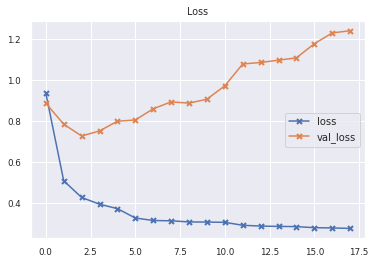

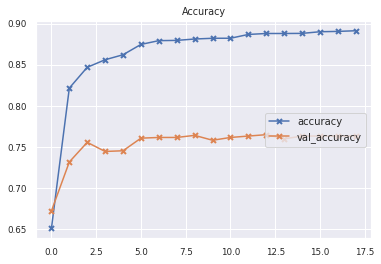

In [235]:
plt.plot(snn.history['loss'],label='loss',marker="x", markersize="5", markeredgewidth="2")
plt.plot(snn.history['val_loss'],label='val_loss',marker="x", markersize="5", markeredgewidth="2")
sn.set(font_scale=.8)
plt.title("Loss")
plt.legend(loc='center right',fontsize='10')
plt.show()

plt.plot(snn.history['accuracy'],label='accuracy',marker="x", markersize="5", markeredgewidth="2")
plt.plot(snn.history['val_accuracy'],label='val_accuracy',marker="x", markersize="5", markeredgewidth="2")
sn.set(font_scale=.8)
plt.title("Accuracy")
plt.legend(loc='center right',fontsize='10')
plt.show()